# Stomach and subtypes

In [1]:
import numpy as np
import pandas as pd
import time
import os
import pickle
import sys
from importlib import reload


from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from utils import CancerType

## 1st iteration, inspect each subtype

In [2]:
stomach = CancerType('Stomach')

In [3]:
stomach.countSubtypes()

[['80103' 19]
 ['81400' 17]
 ['81402' 19]
 ['81403' 763]
 ['81443' 83]
 ['81453' 57]
 ['82113' 82]
 ['84803' 21]
 ['84903' 16]
 ['89363' 175]
 ['C26.8' 29]]


```
80103: Carcinoma
81400: Adenoma, NOS
81402: Adenocarcinoma in situ, NOS
81403: Adenocarcinoma
81443: Adenocarcinoma, intestinal type
81453: Carcinoma, diffuse type
82113: Tubular adenocarcinoma
84803: Mucinous adenocarcinoma
84903: Signet ring cell carcinoma
89363: Gastrointestinal stromal sarcoma
 ```

In [4]:
code_remap = {
'80103': 'Carcinoma',
'81400': 'Adenoma',
'81402': 'Adenocarcinoma in situ',
'81403': 'Adenocarcinoma',
'81443': 'Adenocarcinoma intestinal type',
'81453': 'Carcinoma diffuse type',
'82113': 'Tubular adenocarcinoma',
'84803': 'Mucinous adenocarcinoma',
'84903': 'Signet ring cell carcinoma',
'89363': 'Gastrointestinal stromal sarcoma',
'C26.8': 'Not specified'
}

In [5]:
stomach.relabel(code_remap)

In [6]:
stomach.countSubtypes()

[['Adenocarcinoma' 763]
 ['Adenocarcinoma in situ' 19]
 ['Adenocarcinoma intestinal type' 83]
 ['Adenoma' 17]
 ['Carcinoma' 19]
 ['Carcinoma diffuse type' 57]
 ['Gastrointestinal stromal sarcoma' 175]
 ['Mucinous adenocarcinoma' 21]
 ['Not specified' 29]
 ['Signet ring cell carcinoma' 16]
 ['Tubular adenocarcinoma' 82]]


PCA done! Time elapsed: 0.08412790298461914 seconds
Cumulative explained variation for 50 principal components: 0.8677406451731249
t-SNE done! Time elapsed: 11.183704137802124 seconds


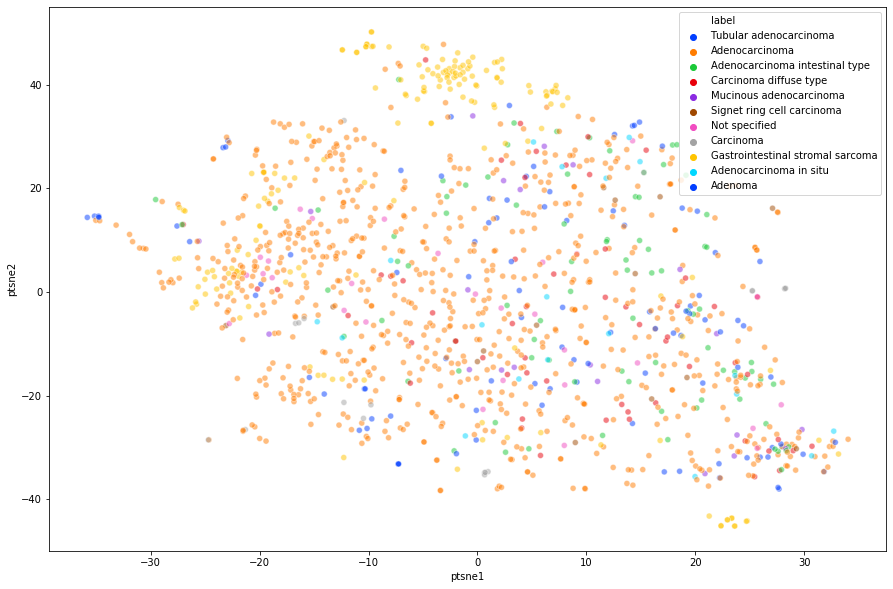

In [7]:
stomach.pcaTSNE()

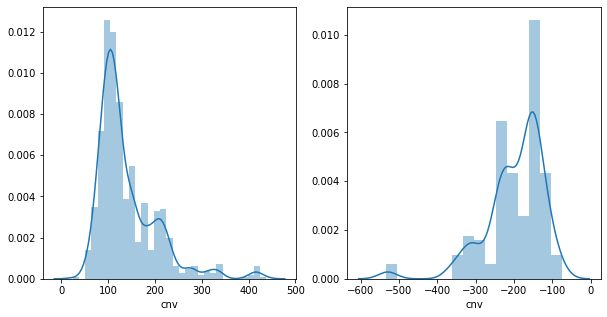

In [8]:
stomach.groupData()

In [9]:
stomach.analyze([350, 180, -450, -270])
stomach.dumpFiles()

In [10]:
stomach.countData()

amp_genes	(166, 9)
del_genes	(25, 9)
genes	166
high_amp_genes	(10, 9)
low_amp_genes	(156, 9)
high_del_genes	(3, 9)
low_del_genes	(22, 9)
high_amp_census	(2, 9)
low_amp_census	(7, 9)
amp_census	(9, 9)
high_del_census	(0, 9)
low_del_census	(1, 9)
del_census	(1, 9)
census	10


### Carcinoma: 8010/3

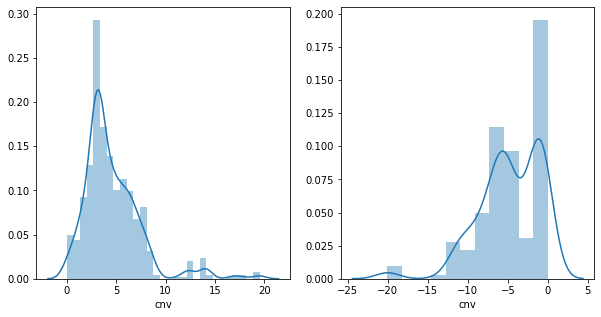

In [11]:
subtype = 'Carcinoma'
stomach.prepareSubtype(subtype)

In [12]:
stomach.analyzeSubtype(subtype,[16,10, -15,-5])
stomach.dumpSubtypeFiles(subtype)

### Adenoma: 8140/0

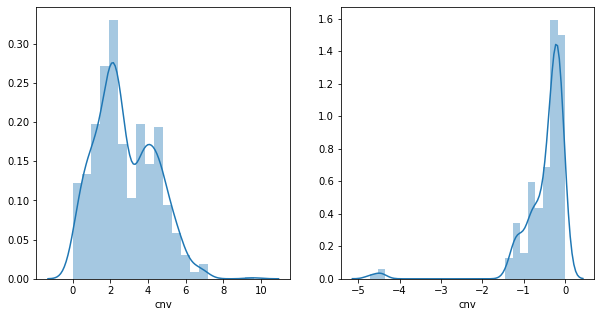

In [13]:
subtype = 'Adenoma'
stomach.prepareSubtype(subtype)

In [14]:
stomach.analyzeSubtype(subtype,[7,3, -2,-1])
stomach.dumpSubtypeFiles(subtype)

### Adenocarcinoma in situ: 8140/2

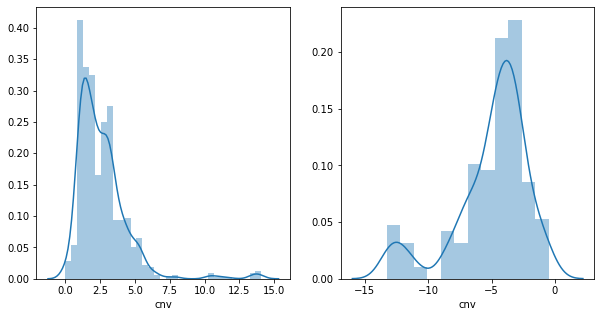

In [15]:
subtype = 'Adenocarcinoma in situ'
stomach.prepareSubtype(subtype)

In [16]:
stomach.analyzeSubtype(subtype,[9,5, -9,-6])
stomach.dumpSubtypeFiles(subtype)

### Adenocarcinoma: 8140/3

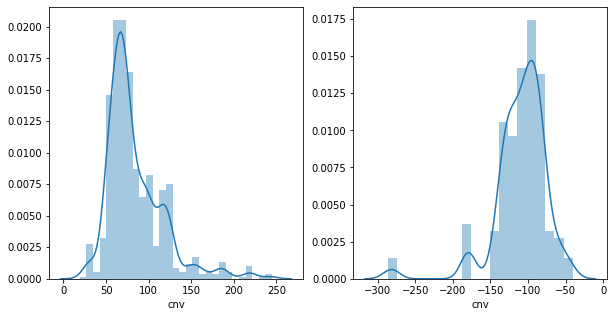

In [17]:
subtype = 'Adenocarcinoma'
stomach.prepareSubtype(subtype)

In [18]:
stomach.analyzeSubtype(subtype,[140,110, -250,-150])
stomach.dumpSubtypeFiles(subtype)

### Adenocarcinoma intestinal type: 8144/3

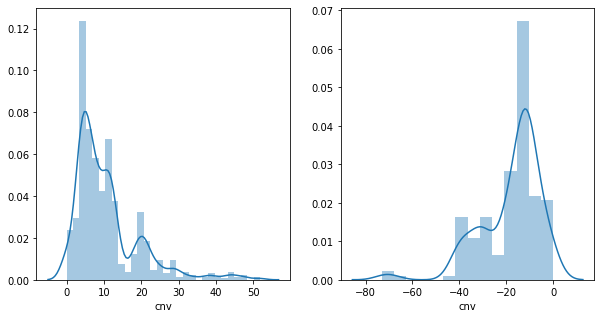

In [19]:
subtype = 'Adenocarcinoma intestinal type'
stomach.prepareSubtype(subtype)

In [20]:
stomach.analyzeSubtype(subtype,[35,15, -50,-25])
stomach.dumpSubtypeFiles(subtype)

### Carcinoma diffuse type: 8145/3

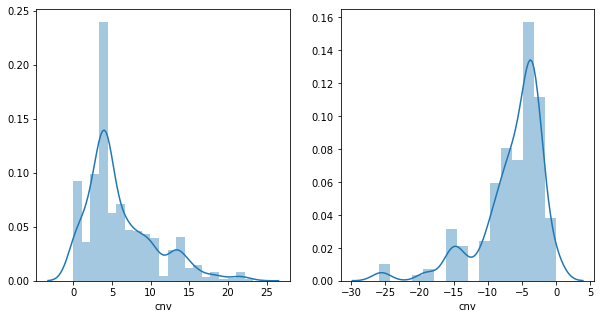

In [21]:
subtype = 'Carcinoma diffuse type'
stomach.prepareSubtype(subtype)

In [22]:
stomach.analyzeSubtype(subtype,[20,12, -21,-12])
stomach.dumpSubtypeFiles(subtype)

### Tubular adenocarcinoma: 8211/3

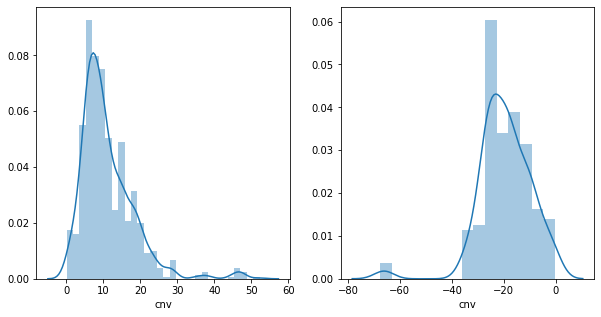

In [23]:
subtype = 'Tubular adenocarcinoma'
stomach.prepareSubtype(subtype)

In [24]:
stomach.analyzeSubtype(subtype,[30,15, -40,-20])
stomach.dumpSubtypeFiles(subtype)

### Mucinous adenocarcinoma: 8480/3

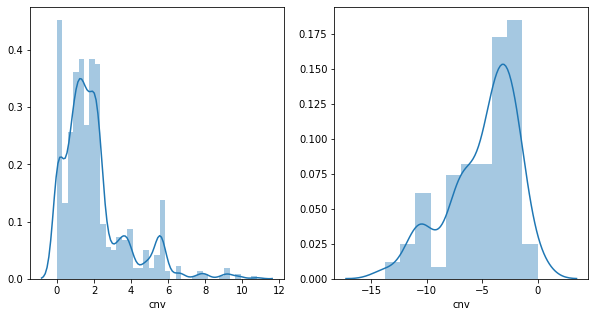

In [25]:
subtype = 'Mucinous adenocarcinoma'
stomach.prepareSubtype(subtype)

In [26]:
stomach.analyzeSubtype(subtype,[5,3, -12,-6])
stomach.dumpSubtypeFiles(subtype)

### Signet ring cell carcinoma: 8490/3

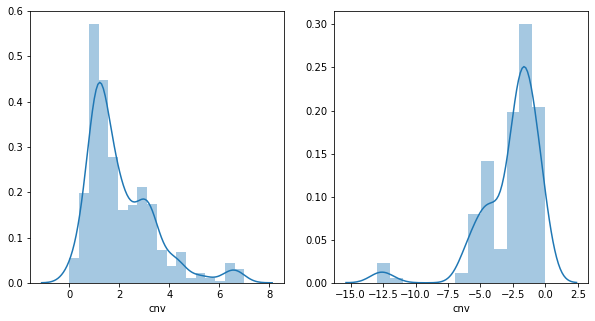

In [27]:
subtype = 'Signet ring cell carcinoma'
stomach.prepareSubtype(subtype)

In [28]:
stomach.analyzeSubtype(subtype,[4.5,2.5, -10,-3])
stomach.dumpSubtypeFiles(subtype)

### Gastrointestinal stromal sarcoma: 8936/3

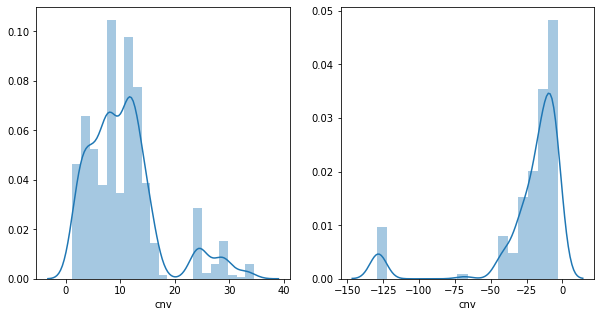

In [29]:
subtype = 'Gastrointestinal stromal sarcoma'
stomach.prepareSubtype(subtype)

In [30]:
stomach.analyzeSubtype(subtype,[20,10, -80,-25])
stomach.dumpSubtypeFiles(subtype)

In [31]:
stomach.dumpSubtypeCounts()

### Conclusion

The adenocarcinoma subtypes have very similar signatures.

Do a clustering first, then decide if to merge them